<a href="https://colab.research.google.com/github/Akashprabhu1/Carbon-emission-prediction-using-AutoML/blob/main/carbon-emission-prediction-using-AutoMl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
plt.style.use('fivethirtyeight')
from sklearn.model_selection import train_test_split
from tpot import TPOTRegressor
from sklearn.metrics import mean_squared_error

 ***Importing the dataset***


In [ ]:
df = pd.read_csv('/kaggle/input/co2-emission-around-the-world/CO2_emission.csv')
df.head(3)

,Country Name,country_code,Region,Indicator Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2019.1
0,Aruba,ABW,Latin America & Caribbean,CO2 emissions (metric tons per capita),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,South Asia,CO2 emissions (metric tons per capita),0.191745,0.167682,0.095958,0.084721,0.075546,0.068468,0.062588,0.056827,0.052691,0.040157,0.036574,0.033785,0.045574,0.051518,0.041655,0.060419,0.066583,0.065312,0.128417,0.171862,0.243614,0.296506,0.259295,0.185624,0.146236,0.172897,0.149789,0.131695,0.163295,0.159824,0.159824
2,Angola,AGO,Sub-Saharan Africa,CO2 emissions (metric tons per capita),0.553662,0.544539,0.543557,0.708984,0.836804,0.912141,1.072168,1.086637,1.091825,1.109860,0.988077,0.941829,0.895578,0.924869,0.930263,0.813539,0.821840,0.811754,0.888658,0.939404,0.976184,0.985522,0.950696,1.036294,1.099779,1.135044,1.031811,0.813301,0.777675,0.792137,0.792137


In [ ]:
df.shape

(215, 35)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    215 non-null    object 
 1   country_code    215 non-null    object 
 2   Region          215 non-null    object 
 3   Indicator Name  215 non-null    object 
 4   1990            185 non-null    float64
 5   1991            186 non-null    float64
 6   1992            189 non-null    float64
 7   1993            189 non-null    float64
 8   1994            189 non-null    float64
 9   1995            190 non-null    float64
 10  1996            190 non-null    float64
 11  1997            190 non-null    float64
 12  1998            189 non-null    float64
 13  1999            189 non-null    float64
 14  2000            190 non-null    float64
 15  2001            190 non-null    float64
 16  2002            191 non-null    float64
 17  2003            191 non-null    flo

Remove unwanted observations from your dataset, including duplicate or irrelevant observations. When combining datasets from multiple sources, there is a chance for duplicate observations.

In [ ]:
#Checking for number of unique countries
df['Country Name'].nunique()

215

In [ ]:
#Checking for duplicated countries
duplicated_country = df[df.duplicated(["Country Name"])]
print(duplicated_country)

Empty DataFrame
Columns: [Country Name, country_code, Region, Indicator Name, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2019.1]
Index: []


Structural errors are strange naming conventions, typos, and inconsistencies with the data structure. Fixing the Structural Data

In [ ]:
df.iloc[:, [-2,-1]]


,2019,2019.1
0,NaN,NaN
1,0.159824,0.159824
2,0.792137,0.792137
3,1.692248,1.692248
4,6.481217,6.481217
...,...,...
210,1.522124,1.522124
211,0.380633,0.380633
212,7.507736,7.507736
213,0.380717,0.380717


In [ ]:
#Column 2019 and 2019.1 seem to have the same values. Let's take a closer look at these two columns
df['2019'].equals(df['2019.1'])

True

In [ ]:
#Dropping column '2019.1'
if '2019.1' in df.columns:
    df.drop(['2019.1'], axis='columns', inplace=True)

In [ ]:
#After dropping the duplicaye column
df.head()

,Country Name,country_code,Region,Indicator Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,Latin America & Caribbean,CO2 emissions (metric tons per capita),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,South Asia,CO2 emissions (metric tons per capita),0.191745,0.167682,0.095958,0.084721,0.075546,0.068468,0.062588,0.056827,0.052691,0.040157,0.036574,0.033785,0.045574,0.051518,0.041655,0.060419,0.066583,0.065312,0.128417,0.171862,0.243614,0.296506,0.259295,0.185624,0.146236,0.172897,0.149789,0.131695,0.163295,0.159824
2,Angola,AGO,Sub-Saharan Africa,CO2 emissions (metric tons per capita),0.553662,0.544539,0.543557,0.708984,0.836804,0.912141,1.072168,1.086637,1.091825,1.109860,0.988077,0.941829,0.895578,0.924869,0.930263,0.813539,0.821840,0.811754,0.888658,0.939404,0.976184,0.985522,0.950696,1.036294,1.099779,1.135044,1.031811,0.813301,0.777675,0.792137
3,Albania,ALB,Europe & Central Asia,CO2 emissions (metric tons per capita),1.819542,1.242810,0.683700,0.638307,0.645355,0.605436,0.612367,0.466921,0.572154,0.955359,1.026213,1.055496,1.232379,1.338985,1.404059,1.338209,1.339996,1.393931,1.384311,1.441494,1.527624,1.669423,1.503240,1.533630,1.668337,1.603775,1.557664,1.788786,1.782739,1.692248
4,Andorra,AND,Europe & Central Asia,CO2 emissions (metric tons per capita),7.521832,7.235379,6.963079,6.724178,6.541579,6.733479,6.991595,7.307441,7.639539,7.923192,7.952286,7.721549,7.566240,7.242416,7.344262,7.353780,6.790543,6.531047,6.439304,6.156687,6.157198,5.850886,5.944654,5.942800,5.807128,6.026182,6.080600,6.104134,6.362975,6.481217


In [ ]:
#Rename column name to be more consistent
df.rename(columns={'Country Name': 'country_name', 'Region': 'region', 'Indicator Name': 'indicator_name'}, inplace=True)


In [ ]:
#Separating the metadata from our dataframe
info = df.iloc[:, 0:4]

#Separating the emissiondata from our dataframe
co2_emission = df.iloc[:, 4:]

In [ ]:
info

,country_name,country_code,region,indicator_name
0,Aruba,ABW,Latin America & Caribbean,CO2 emissions (metric tons per capita)
1,Afghanistan,AFG,South Asia,CO2 emissions (metric tons per capita)
2,Angola,AGO,Sub-Saharan Africa,CO2 emissions (metric tons per capita)
3,Albania,ALB,Europe & Central Asia,CO2 emissions (metric tons per capita)
4,Andorra,AND,Europe & Central Asia,CO2 emissions (metric tons per capita)
...,...,...,...,...
210,Samoa,WSM,East Asia & Pacific,CO2 emissions (metric tons per capita)
211,"Yemen, Rep.",YEM,Middle East & North Africa,CO2 emissions (metric tons per capita)
212,South Africa,ZAF,Sub-Saharan Africa,CO2 emissions (metric tons per capita)
213,Zambia,ZMB,Sub-Saharan Africa,CO2 emissions (metric tons per capita)


In [ ]:
co2_emission

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.191745,0.167682,0.095958,0.084721,0.075546,0.068468,0.062588,0.056827,0.052691,0.040157,0.036574,0.033785,0.045574,0.051518,0.041655,0.060419,0.066583,0.065312,0.128417,0.171862,0.243614,0.296506,0.259295,0.185624,0.146236,0.172897,0.149789,0.131695,0.163295,0.159824
2,0.553662,0.544539,0.543557,0.708984,0.836804,0.912141,1.072168,1.086637,1.091825,1.109860,0.988077,0.941829,0.895578,0.924869,0.930263,0.813539,0.821840,0.811754,0.888658,0.939404,0.976184,0.985522,0.950696,1.036294,1.099779,1.135044,1.031811,0.813301,0.777675,0.792137
3,1.819542,1.242810,0.683700,0.638307,0.645355,0.605436,0.612367,0.466921,0.572154,0.955359,1.026213,1.055496,1.232379,1.338985,1.404059,1.338209,1.339996,1.393931,1.384311,1.441494,1.527624,1.669423,1.503240,1.533630,1.668337,1.603775,1.557664,1.788786,1.782739,1.692248
4,7.521832,7.235379,6.963079,6.724178,6.541579,6.733479,6.991595,7.307441,7.639539,7.923192,7.952286,7.721549,7.566240,7.242416,7.344262,7.353780,6.790543,6.531047,6.439304,6.156687,6.157198,5.850886,5.944654,5.942800,5.807128,6.026182,6.080600,6.104134,6.362975,6.481217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,0.552836,0.609756,0.604266,0.658221,0.592807,0.705675,0.759501,0.755528,0.867860,0.864025,0.859826,0.912232,0.963664,0.957849,1.063848,1.168471,1.105742,1.098629,0.927593,0.975330,1.021813,1.066843,1.057703,1.048702,1.092498,1.240246,1.542099,1.586830,1.478626,1.522124
211,0.567037,0.690937,0.704793,0.627105,0.653256,0.706081,0.698158,0.728608,0.757433,0.830912,0.863343,0.896845,0.872385,0.984988,1.004601,1.049861,1.059569,1.093386,1.106333,1.180025,1.098258,0.963978,0.858491,1.106688,1.062211,0.511362,0.399364,0.359622,0.341068,0.380633
212,6.729799,6.424622,6.175430,6.219194,6.215847,6.378790,6.489192,6.723589,6.787424,6.279186,6.330320,7.033817,7.179056,7.557706,8.035040,7.887329,7.832423,8.083508,8.572610,8.007606,8.304084,7.869816,8.077958,8.138264,8.212241,7.669938,7.563739,7.641675,7.515679,7.507736
213,0.340930,0.349232,0.337224,0.289956,0.241270,0.234153,0.188442,0.238601,0.219937,0.173560,0.173772,0.172088,0.174996,0.184778,0.182674,0.193147,0.179077,0.158363,0.170448,0.188420,0.195502,0.217497,0.278601,0.284058,0.304550,0.312355,0.325115,0.404068,0.445489,0.380717


In [ ]:
#Changing the index to country name
co2_emission.index = df['country_name']

In [ ]:
#Checking for missing values
co2_emission.dropna(inplace=True)


In [ ]:
#Sorting co2 emission for 2019 in descending order
co2_emission = co2_emission.sort_values(by='2019', ascending=False)


In [ ]:
# Average CO2 emission from 1990-2019
co2_emission['avg'] = co2_emission.mean(axis=1)

In [ ]:
# Select the top 10 highest average CO2 emission
co2_avg = co2_emission.sort_values('avg', ascending=False).head(10)
co2_avg = co2_avg.drop('avg', axis='columns')

In [ ]:
# Export CSV for Tableau
co2_emission.to_csv(r'C:\Users\Tony\workspace\co2_emission_project\co2_country.csv', header=True)


In [ ]:
# Separate features (X) and target variable (y)
X = co2_emission.iloc[:, :-1]
y = co2_emission['avg']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize and fit TPOTRegressor
tpot = TPOTRegressor(generations=5, population_size=20, random_state=42, verbosity=2, scoring='neg_mean_squared_error', n_jobs=-1)
tpot.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -2.0743314686250165e-24

Generation 2 - Current best internal CV score: -2.0743314686250165e-24

Generation 3 - Current best internal CV score: -1.0380360673549126e-24

Generation 4 - Current best internal CV score: -7.066008152276794e-25

Generation 5 - Current best internal CV score: -7.066008152276794e-25

Best pipeline: LassoLarsCV(input_matrix, normalize=False)


TPOTRegressor(generations=5, n_jobs=-1, population_size=20, random_state=42,
              scoring='neg_mean_squared_error', verbosity=2)

In [ ]:
# Make predictions on the test set
y_pred = tpot.predict(X_test)


**Mean Squared Error**

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1.0148497128037101e-25


In [ ]:
# Export the pipeline code for future use
tpot.export('tpot_co2_emission_pipeline.py')

**R-squared Score**

In [ ]:
from sklearn.metrics import r2_score

# Evaluate the model using R-squared score
r2 = r2_score(y_test, y_pred)
print(f'R-squared Score: {r2}')

R-squared Score: 1.0


**Mean absolute error**

In [ ]:
from sklearn.metrics import mean_absolute_error

# Assuming 'y_test' contains actual values and 'y_pred' contains predicted values
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 2.0386995395164057e-13


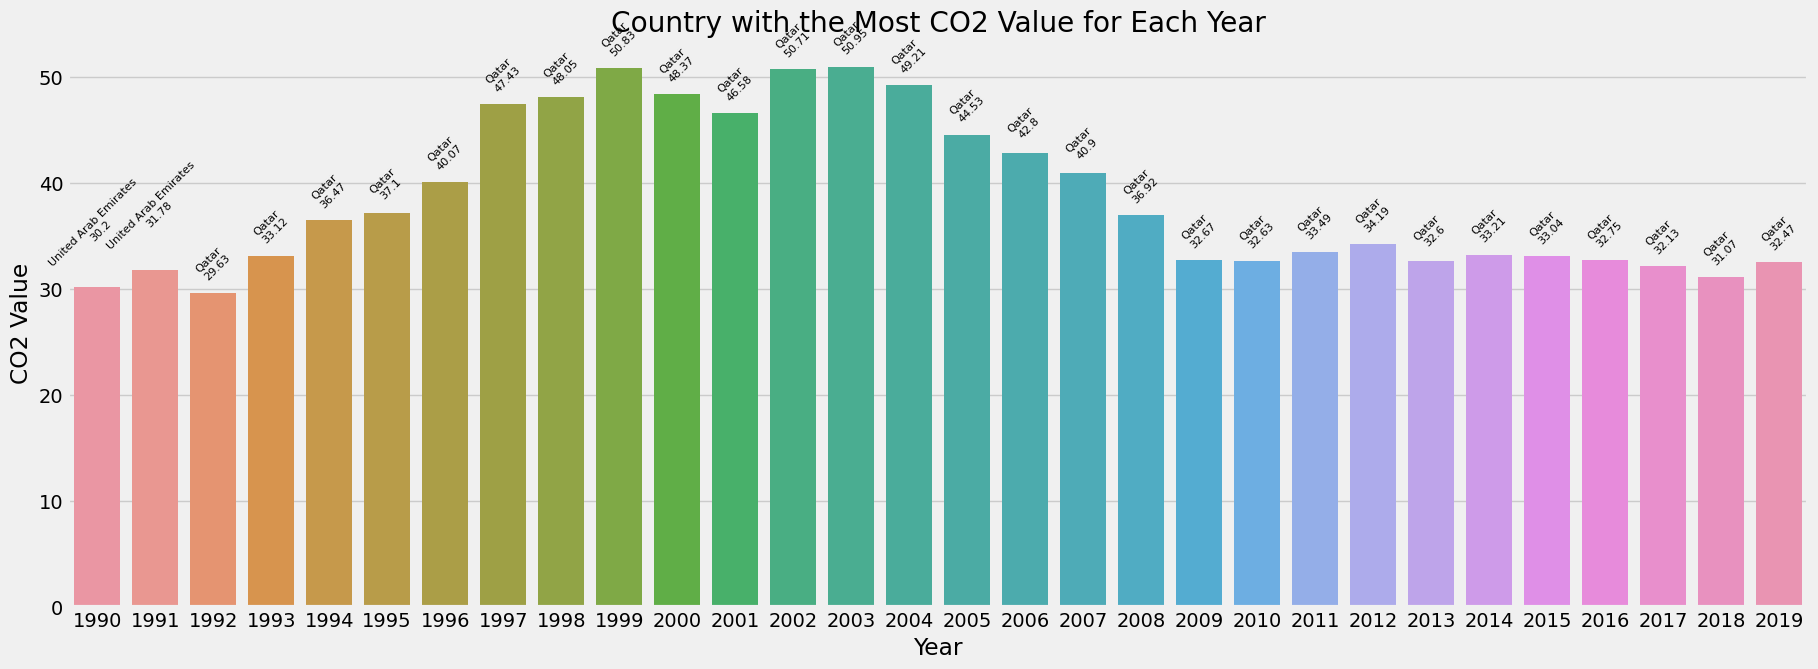

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'co2_emission' DataFrame contains the CO2 values over the years
max_co2_per_year = co2_emission.iloc[:, :-1].idxmax(axis=0)  # Get the country with the max CO2 for each year
max_co2_values = co2_emission.iloc[:, :-1].max(axis=0)  # Get the corresponding max CO2 values

plt.figure(figsize=(20, 7))
g = sns.barplot(x=max_co2_per_year.index, y=max_co2_values.values)

for index, value in enumerate(max_co2_values):
    country_name = max_co2_per_year[index]
    g.text(index, value + 1, f'{country_name}\n{round(value, 2)}', ha='center', va='bottom', rotation=45, fontsize=8)

plt.xlabel('Year')
plt.ylabel('CO2 Value')
plt.title('Country with the Most CO2 Value for Each Year')
plt.show()





# Actual vs Predicted values

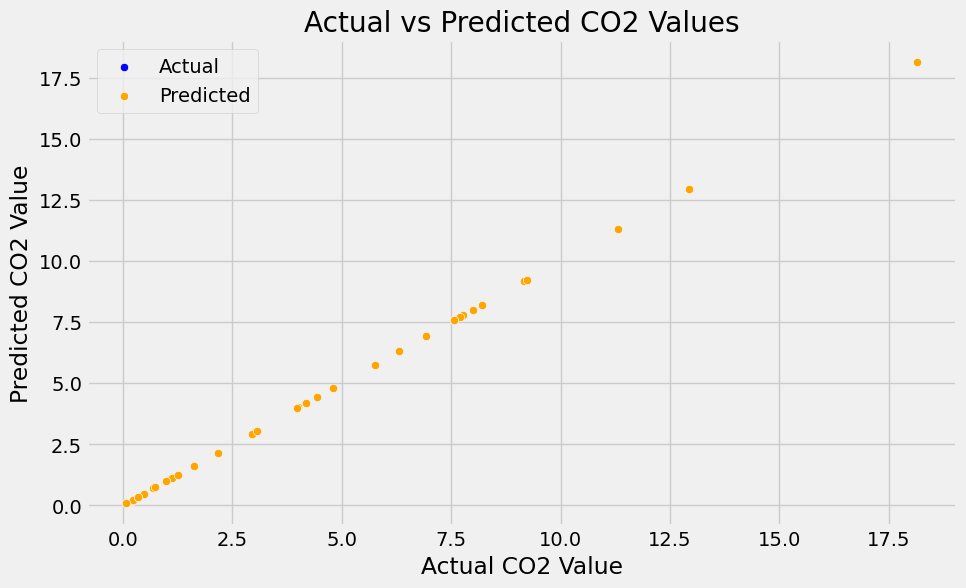

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'y_test' contains actual values and 'y_pred' contains predicted values
plt.figure(figsize=(10, 6))

# Scatter plot for actual values (blue color)
sns.scatterplot(x=y_test, y=y_test, color='blue', label='Actual')

# Scatter plot for predicted values (orange color)
sns.scatterplot(x=y_test, y=y_pred, color='orange', label='Predicted')

plt.xlabel('Actual CO2 Value')
plt.ylabel('Predicted CO2 Value')
plt.title('Actual vs Predicted CO2 Values')
plt.legend()
plt.show()


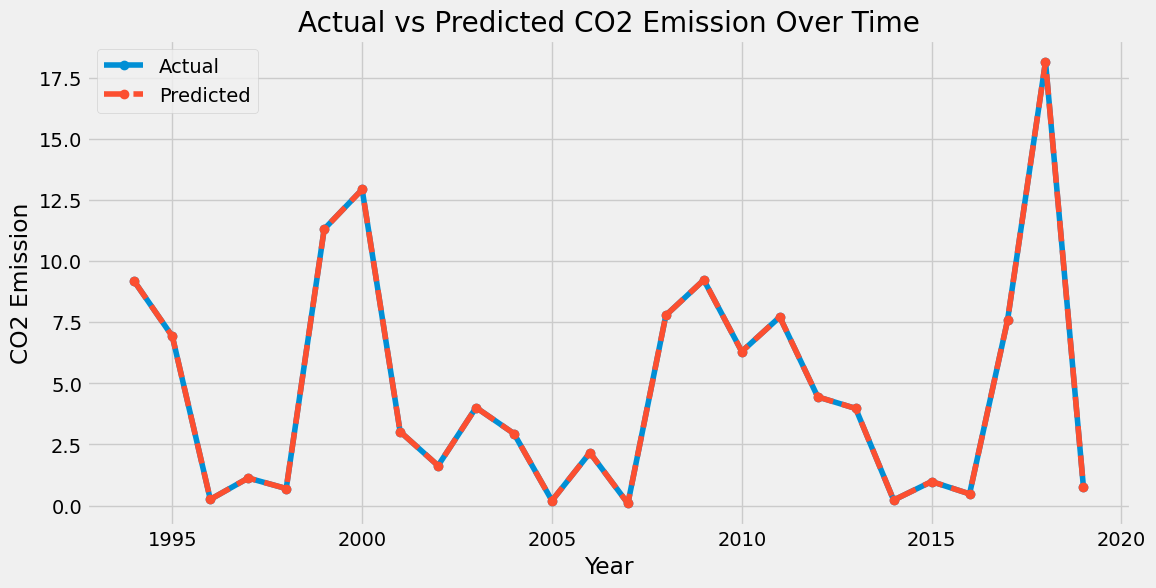

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract years for x-axis
years = np.array(co2_emission.columns[4:-1], dtype=int)

# Get the indices that would sort the years
sort_indices = np.argsort(years)

# Sort the years and corresponding actual and predicted values
sorted_years = years[sort_indices]
sorted_actual = y_test.values[sort_indices]
sorted_predicted = y_pred[sort_indices]

# Plot actual values
plt.figure(figsize=(12, 6))
plt.plot(sorted_years, sorted_actual, label='Actual', marker='o', linestyle='-')

# Plot predicted values
plt.plot(sorted_years, sorted_predicted, label='Predicted', marker='o', linestyle='--')

plt.title('Actual vs Predicted CO2 Emission Over Time')
plt.xlabel('Year')
plt.ylabel('CO2 Emission')
plt.legend()
plt.grid(True)
plt.show()


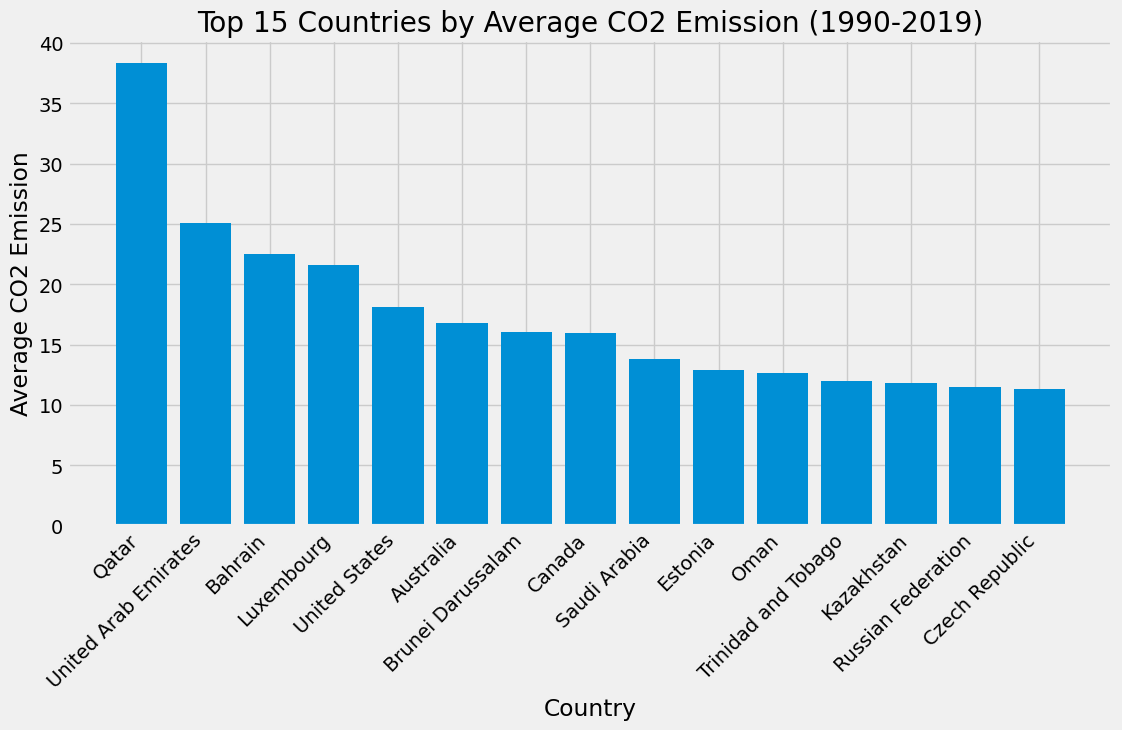

In [ ]:
import matplotlib.pyplot as plt

# Sort countries based on their average CO2 emission
sorted_countries = co2_emission['avg'].sort_values(ascending=False).index

# Select top N countries for better visualization
top_n_countries = 15

# Plot bar chart
plt.figure(figsize=(12, 6))
plt.bar(sorted_countries[:top_n_countries], co2_emission.loc[sorted_countries[:top_n_countries], 'avg'])
plt.title(f'Top {top_n_countries} Countries by Average CO2 Emission (1990-2019)')
plt.xlabel('Country')
plt.ylabel('Average CO2 Emission')
plt.xticks(rotation=45, ha='right')  # Rotate country names for better readability
plt.show()


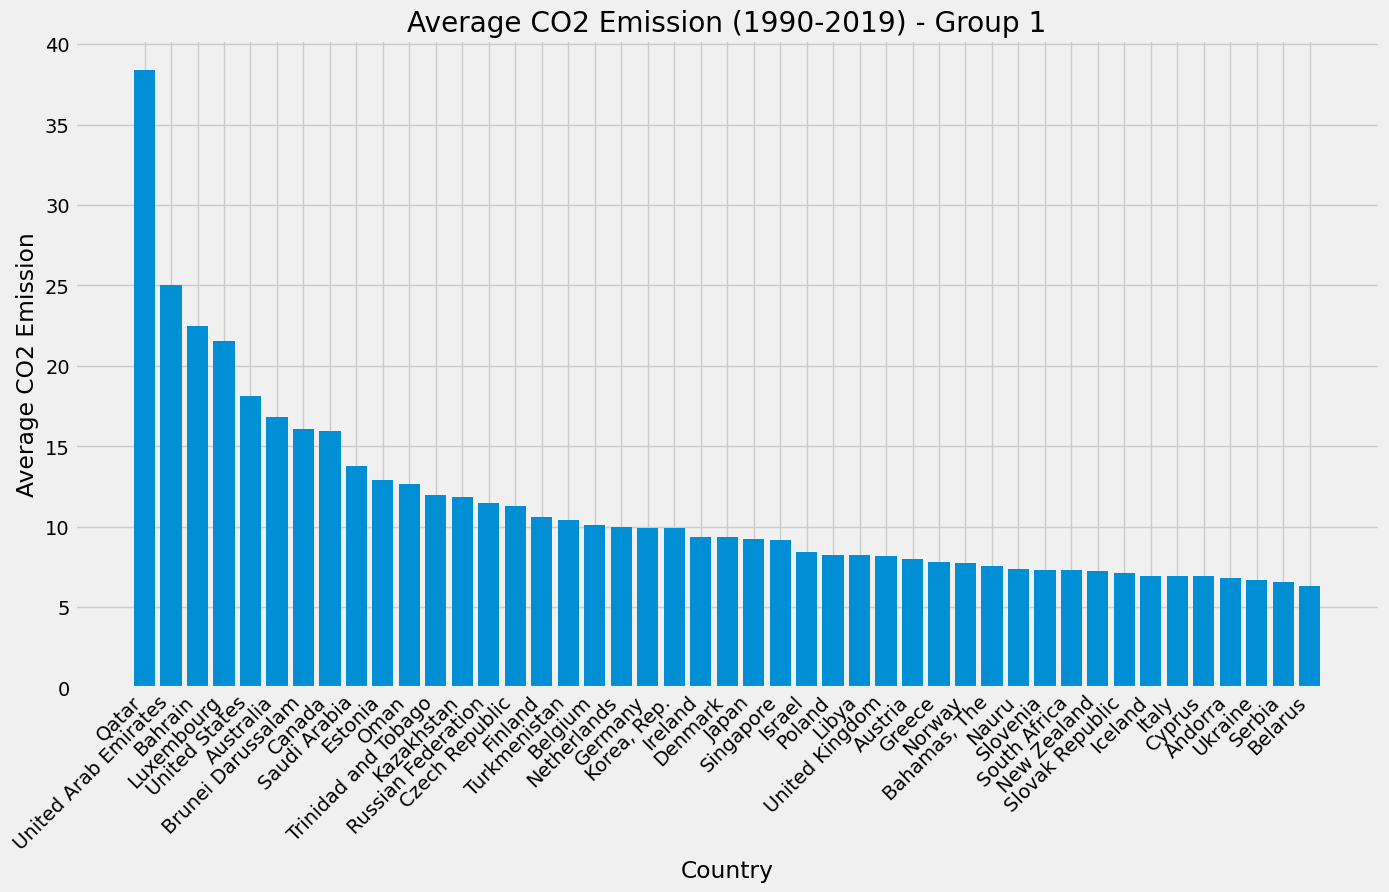

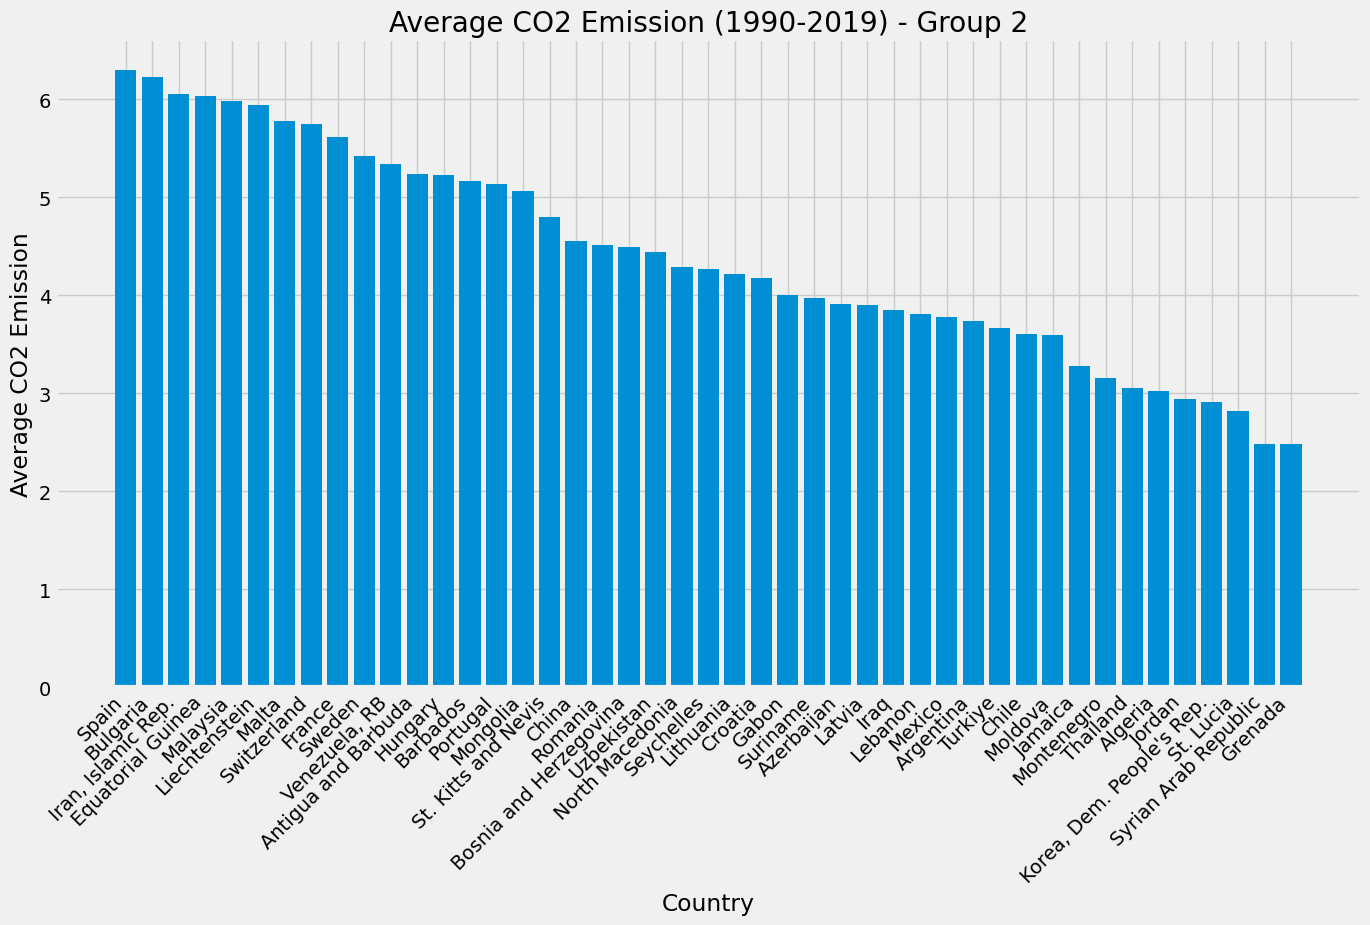

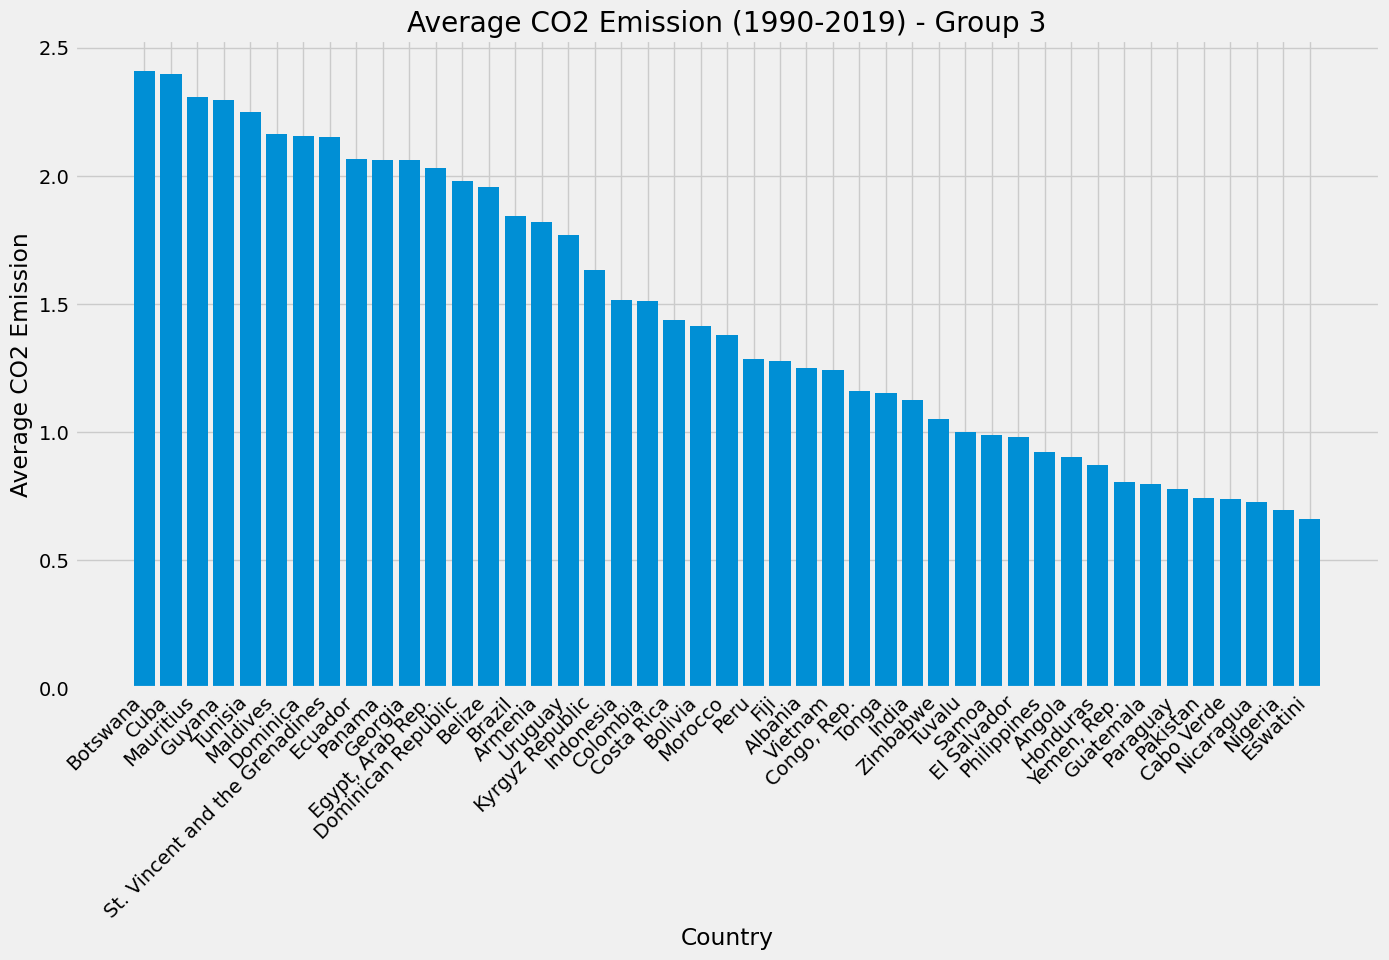

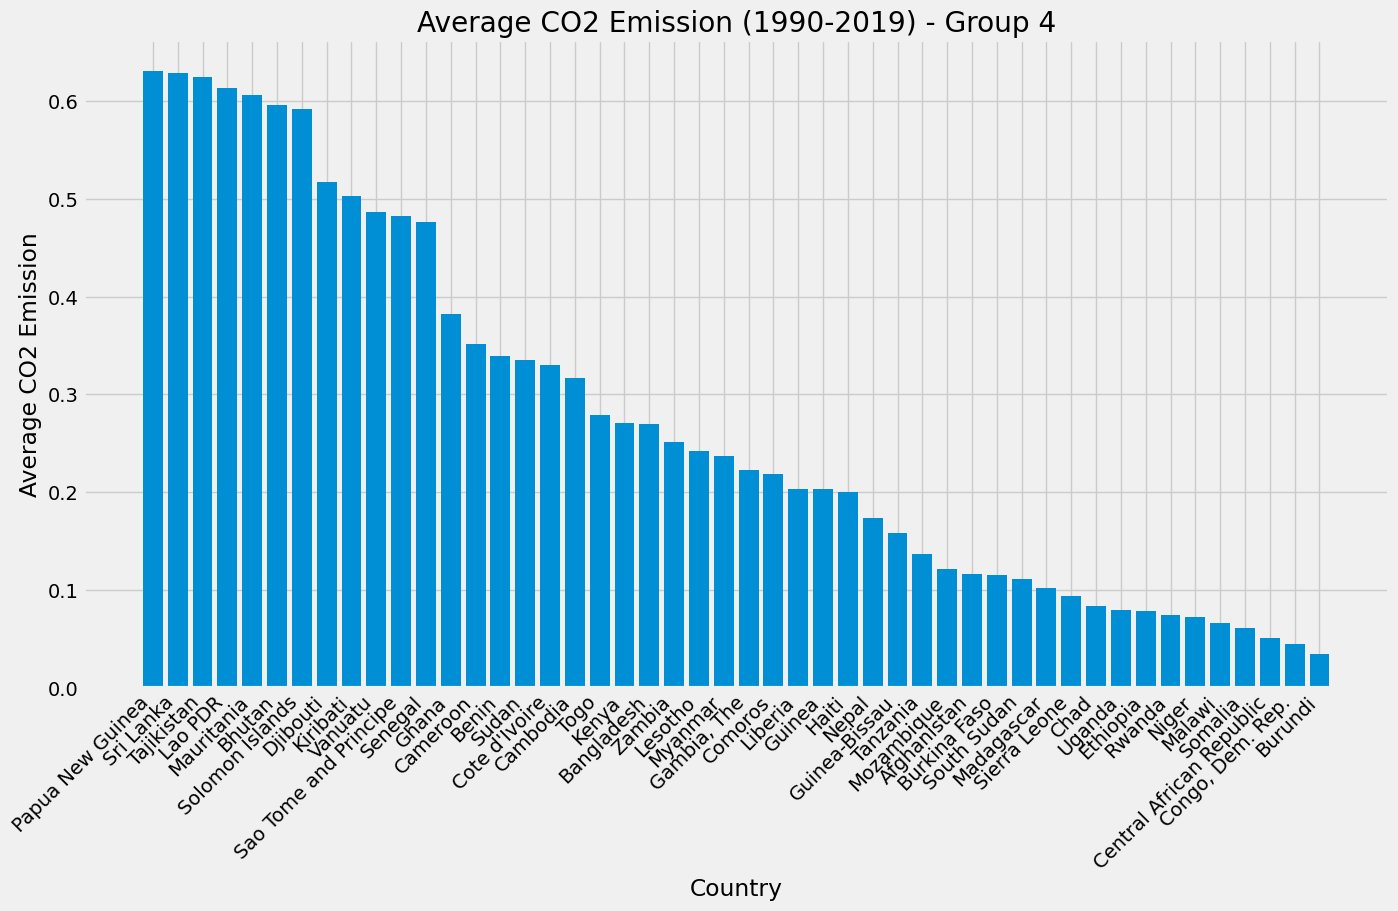

In [ ]:
import matplotlib.pyplot as plt

# Sort countries based on their average CO2 emission
sorted_countries = co2_emission['avg'].sort_values(ascending=False).index

# Split the countries into four groups
quarter_length = len(sorted_countries) // 4
group1 = sorted_countries[:quarter_length]
group2 = sorted_countries[quarter_length: 2 * quarter_length]
group3 = sorted_countries[2 * quarter_length: 3 * quarter_length]
group4 = sorted_countries[3 * quarter_length:]

# Plot bar chart for the first group of countries
plt.figure(figsize=(15, 8))
plt.bar(group1, co2_emission.loc[group1, 'avg'])
plt.title('Average CO2 Emission (1990-2019) - Group 1')
plt.xlabel('Country')
plt.ylabel('Average CO2 Emission')
plt.xticks(rotation=45, ha='right')  # Rotate country names for better readability
plt.show()

# Plot bar chart for the second group of countries
plt.figure(figsize=(15, 8))
plt.bar(group2, co2_emission.loc[group2, 'avg'])
plt.title('Average CO2 Emission (1990-2019) - Group 2')
plt.xlabel('Country')
plt.ylabel('Average CO2 Emission')
plt.xticks(rotation=45, ha='right')  # Rotate country names for better readability
plt.show()

# Plot bar chart for the third group of countries
plt.figure(figsize=(15, 8))
plt.bar(group3, co2_emission.loc[group3, 'avg'])
plt.title('Average CO2 Emission (1990-2019) - Group 3')
plt.xlabel('Country')
plt.ylabel('Average CO2 Emission')
plt.xticks(rotation=45, ha='right')  # Rotate country names for better readability
plt.show()

# Plot bar chart for the fourth group of countries
plt.figure(figsize=(15, 8))
plt.bar(group4, co2_emission.loc[group4, 'avg'])
plt.title('Average CO2 Emission (1990-2019) - Group 4')
plt.xlabel('Country')
plt.ylabel('Average CO2 Emission')
plt.xticks(rotation=45, ha='right')  # Rotate country names for better readability
plt.show()


Text(0.5, 1.0, 'Top 10 Highest Average CO2 Emission per Capita Over Time')

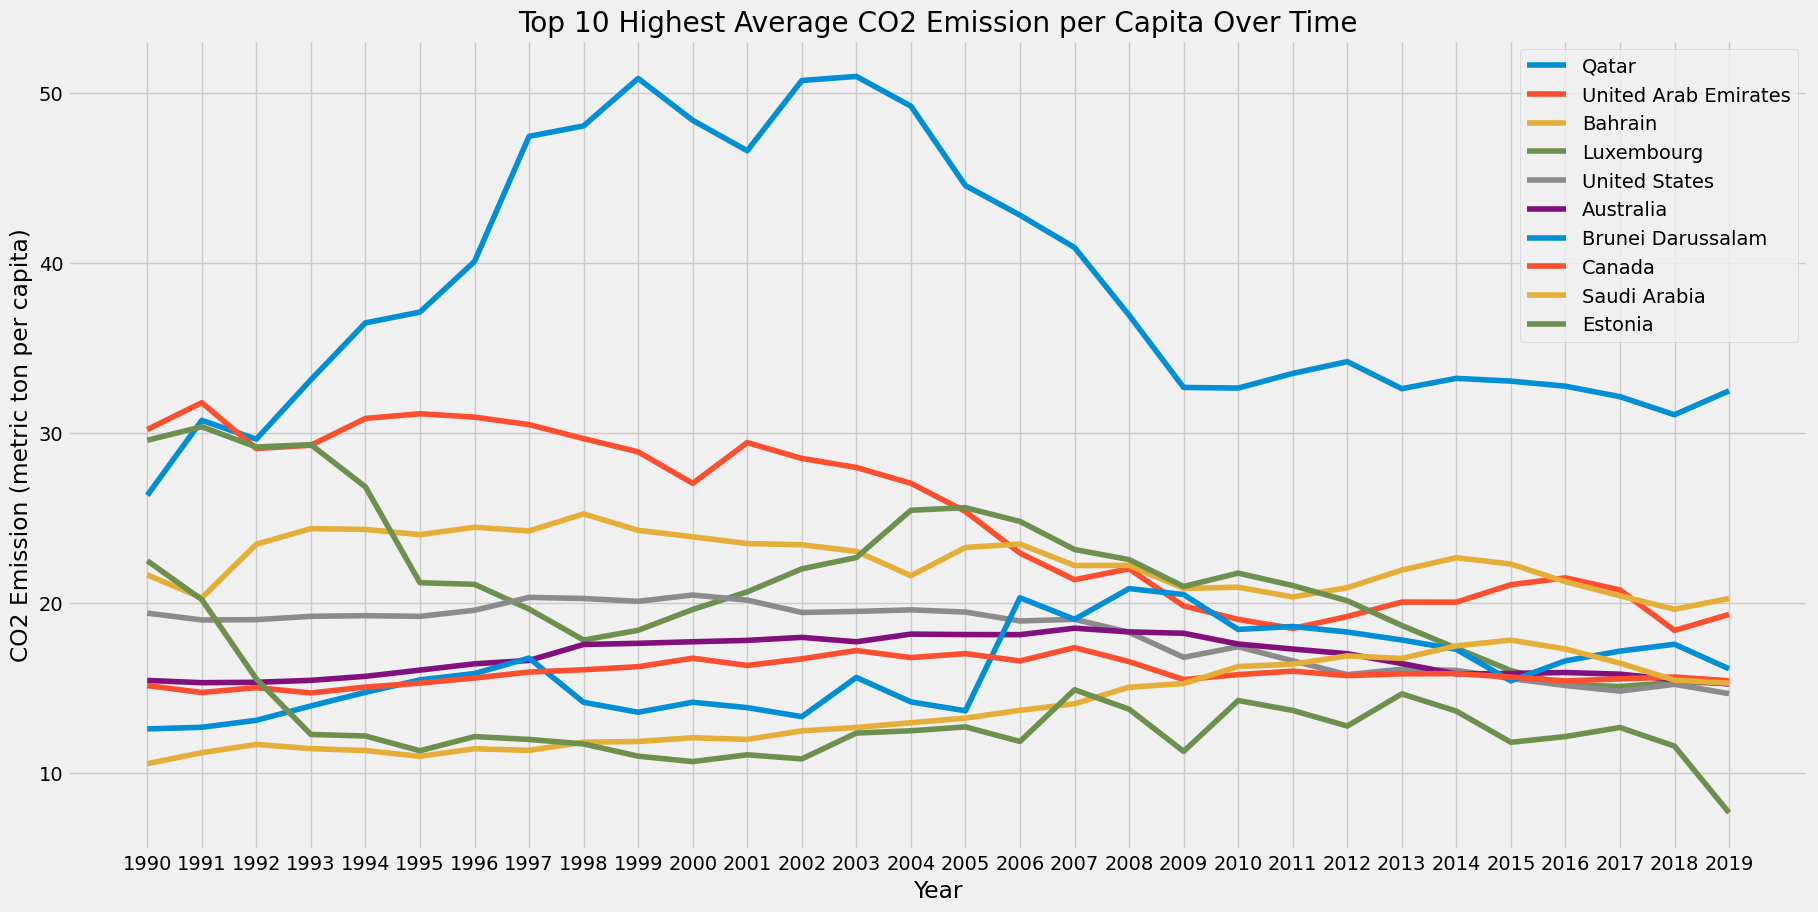

In [ ]:
#Create a new column with the average CO2 emission from 1990-2019
co2_emission['avg'] = co2_emission.mean(axis = 1)

#Select the 20 highest average CO2 emission
co2_avg = co2_emission.sort_values('avg', ascending = False).head(10)

#Drop 'avg' column
co2_avg = co2_avg.drop('avg', axis = 'columns')

#Plot time-series linegraph
fig, ax = plt.subplots(figsize =(20, 10))
n = 0
while n <10:
    sns.lineplot( x = co2_avg.columns, y = co2_avg.iloc[n], label = co2_avg.index[n])
    n = n + 1

plt.xlabel("Year")
plt.ylabel("CO2 Emission (metric ton per capita)")
plt.title("Top 10 Highest Average CO2 Emission per Capita Over Time")